In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from cmocean import cm as cmo
plt.style.use('seaborn-paper')
#plt.style.use('ggplot')

import numpy as np
import pandas as pd
import xarray as xr
import scipy
import matplotlib.dates as mdates
import datetime

import cartopy.crs as ccrs
import cartopy
import matplotlib.gridspec as gridspec
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [133]:
satdap = 'http://basin.ceoe.udel.edu/thredds/dodsC/Aqua1DayAggregate.nc'
avhrr = "http://tds.maracoos.org/thredds/dodsC/AVHRR/2020/3Agg"
avhrr = "http://tds.maracoos.org/thredds/dodsC/AVHRR/2020/Masked/Agg"



In [134]:
df = xr.open_dataset(avhrr)

In [135]:
df

<xarray.Dataset>
Dimensions:  (lat: 3661, lon: 4500, time: 2594)
Coordinates:
  * lon      (lon) float64 -100.0 -99.99 -99.98 -99.97 ... -50.02 -50.01 -50.0
  * lat      (lat) float64 20.0 20.01 20.02 20.03 ... 51.98 51.99 51.99 52.0
  * time     (time) datetime64[ns] 2020-01-01T00:05:00 ... 2020-12-31T22:50:00
Data variables:
    mcsst    (time, lat, lon) float32 ...
Attributes:
    url:                       http://www.ceoe.udel.edu, http://marine.rutger...
    groundstation:             RU-COOL L-band receiver at Rutgers University,...
    history:                    
    creator_name:              Matt Oliver
    creator_email:             moliver@udel.edu
    institution:               University of Delaware
    source:                    NOAA AVHRR
    summary:                   Sea surface temperature over the Mid-Atlantic ...
    title:                     AVHRR Sea Surface Temperature for MARACOOS (Mi...
    keywords:                  MARACOOS, AVHRR, SST, UDEL, Satellite SST, Rut...
    naming_authority:          org.maracoos
    id:                        AVHRR.2020.Masked.Agg
    cdm_data_type:             Grid
    creator_url:               http://orb.ceoe.udel.edu/
    standard_name_vocabulary:  http://www.cgd.ucar.edu/cms/eaton/cf-metadata/...
    publisher_name:            MARACOOS DMAC
    publisher_email:           maracoosinfo@udel.edu
    publisher_url:             http://maracoos.org
    Conventions:               ACDD-1.3, CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    NCO:                       4.0.8
    license:                   Freely Distributed

In [164]:
beforE = mdates.date2num(datetime.datetime(2020,8,3,12))
durinE = mdates.date2num(datetime.datetime(2020,8,4,12))
afterE = mdates.date2num(datetime.datetime(2020,8,7,12))

In [165]:
sat_dnums = mdates.date2num(df.time)

In [166]:
dT = np.abs(sat_dnums - beforE)
qbef = np.where(dT == np.nanmin(dT))[0][0]

dT = np.abs(sat_dnums - afterE)
qaft = np.where(dT == np.nanmin(dT))[0][0]

dT = np.abs(sat_dnums - durinE)
qdur = np.where(dT == np.nanmin(dT))[0][0]
mdates.num2date(sat_dnums[qaft])

datetime.datetime(2020, 8, 7, 11, 27, tzinfo=datetime.timezone.utc)

In [167]:
mdates.num2date(sat_dnums[qbef])

datetime.datetime(2020, 8, 3, 12, 14, tzinfo=datetime.timezone.utc)

In [168]:
latlims = [34,45]
lonlims = [-77, -65]

dLAT = np.abs(df.lat - (latlims[0]-0.5))
qlatLOW = np.where(dLAT == np.nanmin(dLAT))[0][0]
dLAT = np.abs(df.lat - (latlims[1]+0.5))
qlatHIG = np.where(dLAT == np.nanmin(dLAT))[0][0]

dL = np.abs(df.lon - (lonlims[0]-0.5))
qlonLOW = np.where(dL == np.nanmin(dL))[0][0]
dL = np.abs(df.lon - (lonlims[1]+0.5))
qlonHIG = np.where(dL == np.nanmin(dL))[0][0]

In [169]:
df.mcsst.shape, df.lon.shape, df.lat[qlatLOW:qlatHIG].shape

((2594, 3661, 4500), (4500,), (1406,))

In [170]:
LON, LAT = np.meshgrid(df.lon[qlonLOW:qlonHIG], df.lat[qlatLOW:qlatHIG])

In [171]:
a = np.arange(30)
a[2:25:4]

array([ 2,  6, 10, 14, 18, 22])

In [172]:
title_list = [r'3 AUG 2020 12:24', r'6 AUG 2020 11:38']

In [173]:
from glob import glob
trkfile = glob("../data/track_data/csvs/Isaias_2020.csv")
trkfile[0]

'../data/track_data/csvs/Isaias_2020.csv'

In [174]:
dtf = pd.read_csv(trkfile[0], skiprows=[1])

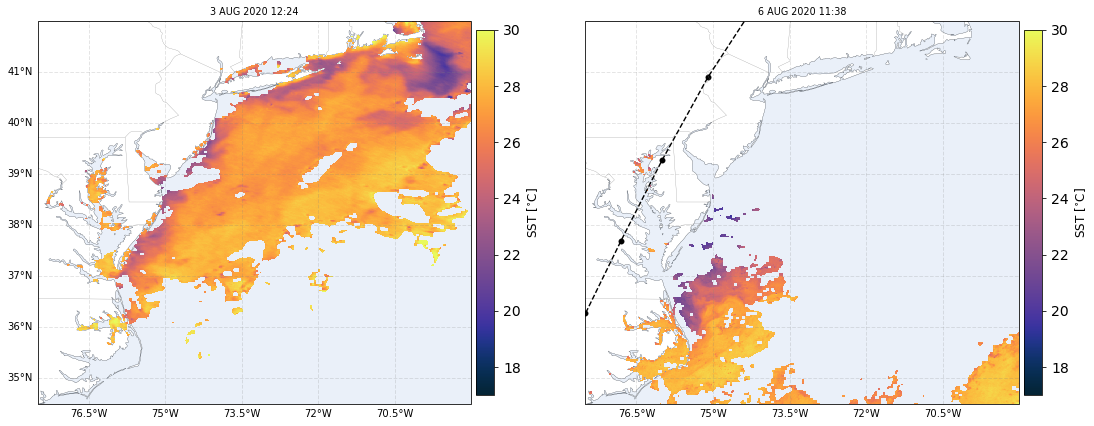

In [175]:
qs = [qbef, qaft]
fig, ax = plt.subplots(ncols=len(qs),nrows=1,figsize=(18,10), subplot_kw={'projection': ccrs.PlateCarree()})

for i in range(len(qs)):
    ax[i].set_title(title_list[i])
    tmap = ax[i].pcolor(df.lon[qlonLOW:qlonHIG:1], df.lat[qlatLOW:qlatHIG:1],
                        df.mcsst[qs[i],qlatLOW:qlatHIG:1,qlonLOW:qlonHIG:1], cmap='cmo.thermal', 
                        vmin=17, vmax=30, shading='auto')
    if i == 1:
        ax[i].plot(dtf['LON'].values, dtf['LAT'].values, linestyle="--", color='k')
        ax[i].scatter(dtf['LON'].values, dtf['LAT'].values, marker="o", color='k')
    ax[i].add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lines',
                     '50m', edgecolor='gray', facecolor='none'))
    ax[i].add_feature(cartopy.feature.BORDERS, edgecolor='k', facecolor='none')
    ax[i].add_feature(cartopy.feature.OCEAN, edgecolor='k', facecolor='none')
    ax[i].add_feature(cartopy.feature.OCEAN, alpha=0.2)
    ax[i].add_feature(cartopy.feature.LAKES, alpha=0.2, edgecolor='k')
    ax[i].set_ylim([34.5,42])
    ax[i].set_xlim([-77.5, -69])
    cbar = plt.colorbar(tmap, fraction=0.04, pad=0.01, ax=ax[i])
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label(label='SST [$^{\circ}$C]', size='large')
    gl = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.2, linestyle='--')

    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    if i ==0:
        gl.top_labels = False
        gl.right_labels = False
    else:
        gl.top_labels = False
        gl.right_labels = False
        gl.left_labels = False

plt.savefig("FIGS/AVHRR_SST_Isaias.png", bbox_inches='tight')
plt.show()

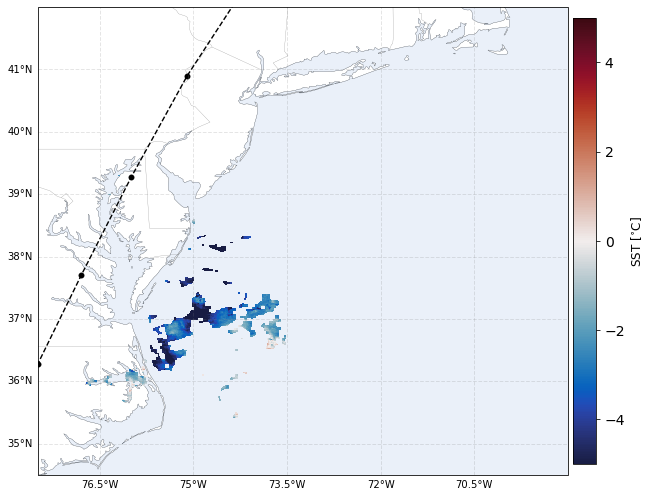

In [176]:
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})

#ax.set_title(title_list[i])
tmap = ax.pcolor(df.lon[qlonLOW:qlonHIG:1], df.lat[qlatLOW:qlatHIG:1],
                    df.mcsst[qs[1],qlatLOW:qlatHIG:1,qlonLOW:qlonHIG:1]-df.mcsst[qs[0],qlatLOW:qlatHIG:1,qlonLOW:qlonHIG:1], 
                    cmap='cmo.balance', 
                    vmin=-5, vmax=5, shading='auto')
    
ax.plot(dtf['LON'].values, dtf['LAT'].values, linestyle="--", color='k')
ax.scatter(dtf['LON'].values, dtf['LAT'].values, marker="o", color='k')
ax.add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lines',
                 '50m', edgecolor='gray', facecolor='none'))
ax.add_feature(cartopy.feature.BORDERS, edgecolor='k', facecolor='none')
ax.add_feature(cartopy.feature.OCEAN, edgecolor='k', facecolor='none')
ax.add_feature(cartopy.feature.OCEAN, alpha=0.2)
ax.add_feature(cartopy.feature.LAKES, alpha=0.2, edgecolor='k')
ax.set_ylim([34.5,42])
ax.set_xlim([-77.5, -69])
cbar = plt.colorbar(tmap, fraction=0.04, pad=0.01, ax=ax)
cbar.ax.tick_params(labelsize=14)
cbar.set_label(label='SST [$^{\circ}$C]', size='large')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=1, color='gray', alpha=0.2, linestyle='--')

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

gl.top_labels = False
gl.right_labels = False

plt.savefig("FIGS/AVHRR_dSST_Isaias.png", bbox_inches='tight')
plt.show()

In [177]:
np.zero

AttributeError: module 'numpy' has no attribute 'zero'

In [ ]:
title_list = [r'2 AUG 2020', r'6 AUG 2020']

In [ ]:
qs = [qbef, qaft]
fig, ax = plt.subplots(ncols=len(qs),nrows=1,figsize=(18,10), subplot_kw={'projection': ccrs.PlateCarree()})

for i in range(len(qs)):
    ax[i].set_title(title_list[i])
    tmap = ax[i].pcolor(df.lon[qlonLOW:qlonHIG], df.lat[qlatLOW:qlatHIG],
                        df.sst[qs[i],qlatLOW:qlatHIG,qlonLOW:qlonHIG], cmap='cmo.thermal', 
                        vmin=8, vmax=30, shading='auto')
    ax[i].add_feature(cartopy.feature.NaturalEarthFeature('cultural', 'admin_1_states_provinces_lines',
                     '50m', edgecolor='gray', facecolor='none'))
    ax[i].add_feature(cartopy.feature.BORDERS, edgecolor='k', facecolor='none')
    ax[i].add_feature(cartopy.feature.OCEAN, edgecolor='k', facecolor='none')
    ax[i].add_feature(cartopy.feature.OCEAN, alpha=0.2)
    ax[i].add_feature(cartopy.feature.LAKES, alpha=0.2, edgecolor='k')
    ax[i].set_ylim([34,45])
    ax[i].set_xlim([-77, -65])
    plt.colorbar(tmap, fraction=0.04, label="SST [C]", pad=0.01, ax=ax[i])
    gl = ax[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.2, linestyle='--')

    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    if i ==0:
        gl.top_labels = False
        gl.right_labels = False
    else:
        gl.top_labels = False
        gl.right_labels = False
        gl.left_labels = False

plt.savefig("FIGS/Aqua_SST_Isaias.pdf", bbox_inches='tight')
plt.show()